In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_regression

In [5]:
X, y = make_regression(n_samples=10, n_features=3)

# Работа ручками

In [16]:
df = pd.DataFrame(X)

In [17]:
df

,0,1,2
0,0.138203,-0.468112,0.070108
1,0.473489,0.718285,0.545972
2,2.037733,0.893996,-0.724416
3,-0.603600,1.304701,0.858202
4,-1.031159,-0.495714,0.940538
5,-0.361451,0.501994,1.079037
6,-0.215708,0.185304,0.294766
7,0.699635,1.733681,-0.900962
8,0.238705,0.034372,0.391592
9,-0.068925,1.125613,-0.197731


In [18]:
df['y_true'] = y

In [19]:
df

,0,1,2,y_true
0,0.138203,-0.468112,0.070108,-42.388468
1,0.473489,0.718285,0.545972,76.587794
2,2.037733,0.893996,-0.724416,85.149806
3,-0.603600,1.304701,0.858202,130.127710
4,-1.031159,-0.495714,0.940538,-40.031755
5,-0.361451,0.501994,1.079037,58.715709
6,-0.215708,0.185304,0.294766,19.976745
7,0.699635,1.733681,-0.900962,155.094912
8,0.238705,0.034372,0.391592,9.283313
9,-0.068925,1.125613,-0.197731,102.883751


In [20]:
df['y_pred_0'] =  df['y_true'].mean()

In [21]:
df

,0,1,2,y_true,y_pred_0
0,0.138203,-0.468112,0.070108,-42.388468,55.539952
1,0.473489,0.718285,0.545972,76.587794,55.539952
2,2.037733,0.893996,-0.724416,85.149806,55.539952
3,-0.603600,1.304701,0.858202,130.127710,55.539952
4,-1.031159,-0.495714,0.940538,-40.031755,55.539952
5,-0.361451,0.501994,1.079037,58.715709,55.539952
6,-0.215708,0.185304,0.294766,19.976745,55.539952
7,0.699635,1.733681,-0.900962,155.094912,55.539952
8,0.238705,0.034372,0.391592,9.283313,55.539952
9,-0.068925,1.125613,-0.197731,102.883751,55.539952


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mean_absolute_error(df['y_true'], df['y_pred_0'])

55.06399433242958

Чтобы начать ГБ надо посчитать остатки (ошибки) residual

In [25]:
df['residual_0'] = df['y_true'] - df['y_pred_0']

In [27]:
df

,0,1,2,y_true,y_pred_0,residual_0
0,0.138203,-0.468112,0.070108,-42.388468,55.539952,-97.928420
1,0.473489,0.718285,0.545972,76.587794,55.539952,21.047842
2,2.037733,0.893996,-0.724416,85.149806,55.539952,29.609854
3,-0.603600,1.304701,0.858202,130.127710,55.539952,74.587758
4,-1.031159,-0.495714,0.940538,-40.031755,55.539952,-95.571706
5,-0.361451,0.501994,1.079037,58.715709,55.539952,3.175757
6,-0.215708,0.185304,0.294766,19.976745,55.539952,-35.563207
7,0.699635,1.733681,-0.900962,155.094912,55.539952,99.554961
8,0.238705,0.034372,0.391592,9.283313,55.539952,-46.256639
9,-0.068925,1.125613,-0.197731,102.883751,55.539952,47.343799


In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
tree_1 = DecisionTreeRegressor(max_depth=1)

In [32]:
tree_1.fit(df[[0, 1, 2]], df['residual_0'])

DecisionTreeRegressor(max_depth=1)

In [38]:
df['tree_pred_1'] = tree_1.predict(df[[0, 1, 2]])

In [46]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1
0,0.138203,-0.468112,0.070108,-42.388468,55.539952,-97.928420,-68.829993
1,0.473489,0.718285,0.545972,76.587794,55.539952,21.047842,45.886662
2,2.037733,0.893996,-0.724416,85.149806,55.539952,29.609854,45.886662
3,-0.603600,1.304701,0.858202,130.127710,55.539952,74.587758,45.886662
4,-1.031159,-0.495714,0.940538,-40.031755,55.539952,-95.571706,-68.829993
5,-0.361451,0.501994,1.079037,58.715709,55.539952,3.175757,45.886662
6,-0.215708,0.185304,0.294766,19.976745,55.539952,-35.563207,-68.829993
7,0.699635,1.733681,-0.900962,155.094912,55.539952,99.554961,45.886662
8,0.238705,0.034372,0.391592,9.283313,55.539952,-46.256639,-68.829993
9,-0.068925,1.125613,-0.197731,102.883751,55.539952,47.343799,45.886662


In [47]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[1] <= 0.344\nsquared_error = 4117.414\nsamples = 10\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 794.518\nsamples = 4\nvalue = -68.83'),
 Text(0.75, 0.25, 'squared_error = 1068.714\nsamples = 6\nvalue = 45.887')]

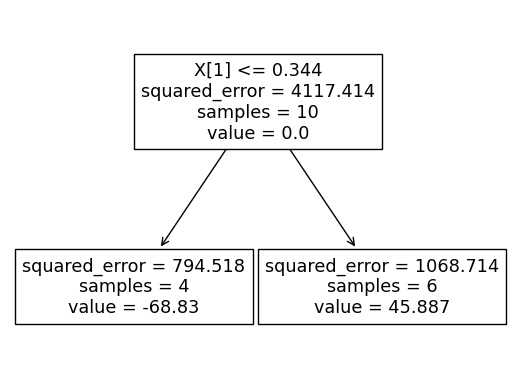

In [48]:
plot_tree(tree_1)

In [49]:
lr = 0.1

In [50]:
df['y_pred_1'] = df['y_pred_0'] + lr*df['tree_pred_1']

In [51]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1
0,0.138203,-0.468112,0.070108,-42.388468,55.539952,-97.928420,-68.829993,48.656953
1,0.473489,0.718285,0.545972,76.587794,55.539952,21.047842,45.886662,60.128618
2,2.037733,0.893996,-0.724416,85.149806,55.539952,29.609854,45.886662,60.128618
3,-0.603600,1.304701,0.858202,130.127710,55.539952,74.587758,45.886662,60.128618
4,-1.031159,-0.495714,0.940538,-40.031755,55.539952,-95.571706,-68.829993,48.656953
5,-0.361451,0.501994,1.079037,58.715709,55.539952,3.175757,45.886662,60.128618
6,-0.215708,0.185304,0.294766,19.976745,55.539952,-35.563207,-68.829993,48.656953
7,0.699635,1.733681,-0.900962,155.094912,55.539952,99.554961,45.886662,60.128618
8,0.238705,0.034372,0.391592,9.283313,55.539952,-46.256639,-68.829993,48.656953
9,-0.068925,1.125613,-0.197731,102.883751,55.539952,47.343799,45.886662,60.128618


In [54]:
mean_absolute_error(df['y_true'], df['y_pred_1'])

49.8401767889791

In [55]:
df['residual_1'] = df['y_true'] - df['y_pred_1']

In [57]:
tree_2 = DecisionTreeRegressor(max_depth=1)

In [59]:
tree_2.fit(df[[0, 1, 2]], df['residual_1'])

DecisionTreeRegressor(max_depth=1)

In [60]:
df['tree_pred_2'] = tree_2.predict(df[[0, 1, 2]]) 

In [61]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1,tree_pred_2
0,0.138203,-0.468112,0.070108,-42.388468,55.539952,-97.928420,-68.829993,48.656953,-91.045421,-61.946994
1,0.473489,0.718285,0.545972,76.587794,55.539952,21.047842,45.886662,60.128618,16.459176,41.297996
2,2.037733,0.893996,-0.724416,85.149806,55.539952,29.609854,45.886662,60.128618,25.021188,41.297996
3,-0.603600,1.304701,0.858202,130.127710,55.539952,74.587758,45.886662,60.128618,69.999092,41.297996
4,-1.031159,-0.495714,0.940538,-40.031755,55.539952,-95.571706,-68.829993,48.656953,-88.688707,-61.946994
5,-0.361451,0.501994,1.079037,58.715709,55.539952,3.175757,45.886662,60.128618,-1.412909,41.297996
6,-0.215708,0.185304,0.294766,19.976745,55.539952,-35.563207,-68.829993,48.656953,-28.680207,-61.946994
7,0.699635,1.733681,-0.900962,155.094912,55.539952,99.554961,45.886662,60.128618,94.966294,41.297996
8,0.238705,0.034372,0.391592,9.283313,55.539952,-46.256639,-68.829993,48.656953,-39.373639,-61.946994
9,-0.068925,1.125613,-0.197731,102.883751,55.539952,47.343799,45.886662,60.128618,42.755133,41.297996


In [62]:
df['y_pred_2'] = df['y_pred_1'] + lr*df['tree_pred_2']

In [63]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1,tree_pred_2,y_pred_2
0,0.138203,-0.468112,0.070108,-42.388468,55.539952,-97.928420,-68.829993,48.656953,-91.045421,-61.946994,42.462253
1,0.473489,0.718285,0.545972,76.587794,55.539952,21.047842,45.886662,60.128618,16.459176,41.297996,64.258418
2,2.037733,0.893996,-0.724416,85.149806,55.539952,29.609854,45.886662,60.128618,25.021188,41.297996,64.258418
3,-0.603600,1.304701,0.858202,130.127710,55.539952,74.587758,45.886662,60.128618,69.999092,41.297996,64.258418
4,-1.031159,-0.495714,0.940538,-40.031755,55.539952,-95.571706,-68.829993,48.656953,-88.688707,-61.946994,42.462253
5,-0.361451,0.501994,1.079037,58.715709,55.539952,3.175757,45.886662,60.128618,-1.412909,41.297996,64.258418
6,-0.215708,0.185304,0.294766,19.976745,55.539952,-35.563207,-68.829993,48.656953,-28.680207,-61.946994,42.462253
7,0.699635,1.733681,-0.900962,155.094912,55.539952,99.554961,45.886662,60.128618,94.966294,41.297996,64.258418
8,0.238705,0.034372,0.391592,9.283313,55.539952,-46.256639,-68.829993,48.656953,-39.373639,-61.946994,42.462253
9,-0.068925,1.125613,-0.197731,102.883751,55.539952,47.343799,45.886662,60.128618,42.755133,41.297996,64.258418


In [64]:
mean_absolute_error(df['y_true'], df['y_pred_2'])

45.71037721404688

# Заверну в цикл

In [65]:
df = df[[0,1,2,'y_true']].copy()

In [66]:
df

,0,1,2,y_true
0,0.138203,-0.468112,0.070108,-42.388468
1,0.473489,0.718285,0.545972,76.587794
2,2.037733,0.893996,-0.724416,85.149806
3,-0.603600,1.304701,0.858202,130.127710
4,-1.031159,-0.495714,0.940538,-40.031755
5,-0.361451,0.501994,1.079037,58.715709
6,-0.215708,0.185304,0.294766,19.976745
7,0.699635,1.733681,-0.900962,155.094912
8,0.238705,0.034372,0.391592,9.283313
9,-0.068925,1.125613,-0.197731,102.883751


In [77]:
n = 20 # количество деревьев
lr = 0.1
trees = []
tree_deep = 2
df['y_pred'] = df['y_true'].mean()

for i in range(n):
    df['residual'] = df['y_true'] - df['y_pred']
    tree = DecisionTreeRegressor(max_depth=tree_deep)
    tree.fit(df[[0,1,2]], df['residual'])
    df['y_pred'] += lr*tree.predict(df[[0, 1, 2]])
    print(mean_absolute_error(df['y_true'], df['y_pred']))

49.557594899186626
44.92786796091822
40.73045572102944
37.075751646438825
33.36817648179495
30.269903323050066
27.242912990745072
24.705186911953763
22.234668220758383
20.22624960687774
18.20362464618997
16.49927877668739
14.849350899018651
13.441180863927883
12.221738078555457
11.11219580335562
10.000976223020057
9.04953985379866
8.188744041715378
7.412816391591123
